In [1]:
#importing the libraries
import pandas as pd

In [2]:
#loading the dataset in pandas dataframe
employee_df = pd.read_csv('/content/Employers_data.csv')

In [3]:
#printing first five rows
employee_df.head()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [4]:
employee_df.shape

(10000, 10)

In [5]:
employee_df.tail()

,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
9995,9996,Thomas Rossin,51,Male,Sales,Executive,28,Master,Austin,185000
9996,9997,Christie King,36,Female,Sales,Executive,9,PhD,San Francisco,165000
9997,9998,Alfred Keller,57,Male,Sales,Executive,30,PhD,New York,200000
9998,9999,Margaret Gomez,37,Female,Engineering,Manager,14,Master,New York,135000
9999,10000,Joan Sorensen,25,Female,Sales,Analyst,4,Bachelor,San Francisco,70000


In [6]:
#Checking any missing values in dataset
employee_df.isna().sum()

,0
Employee_ID,0
Name,0
Age,0
Gender,0
Department,0
Job_Title,0
Experience_Years,0
Education_Level,0
Location,0
Salary,0


In [7]:
#dropping employee id and name
employee_df = employee_df.drop(columns='Employee_ID',axis = 1)
employee_df = employee_df.drop(columns='Name',axis = 1)

In [8]:
employee_df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,56,Male,Sales,Executive,33,Master,Seattle,195000
2,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,25,Female,HR,Analyst,2,Master,Seattle,70000


In [9]:
#counting values of gender column
employee_df['Gender'].value_counts()

,count
Gender,
Male,5108
Female,4892


In [10]:
#counting values of Department column
employee_df['Department'].value_counts()

,count
Department,
Product,1724
Engineering,1683
Sales,1669
Marketing,1669
HR,1660
Finance,1595


In [11]:
#counting values of Job_Title column
employee_df['Job_Title'].value_counts()

,count
Job_Title,
Manager,3325
Analyst,2799
Executive,1921
Engineer,1375
Intern,580


In [12]:
#counting values of Education_Level column
employee_df['Education_Level'].value_counts()

,count
Education_Level,
Master,4930
Bachelor,3381
PhD,1689


In [13]:
#counting values of Location column
employee_df['Location'].value_counts()

,count
Location,
Austin,2034
Seattle,2017
Chicago,2008
New York,1980
San Francisco,1961


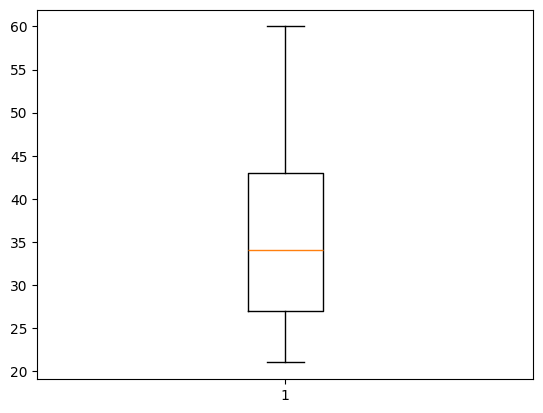

In [14]:
#outlier detection for age column
import matplotlib.pyplot as plt
plt.boxplot(employee_df['Age'])
plt.show()

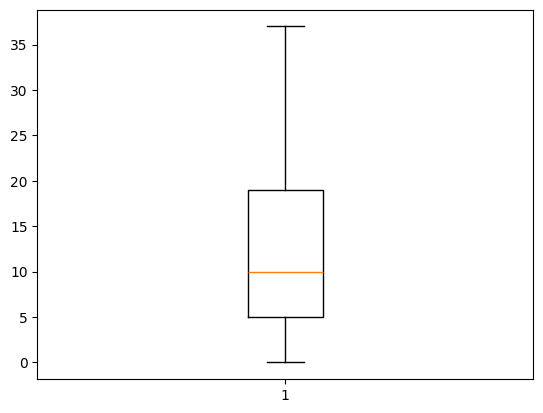

In [15]:
#outlier detection for experience column
plt.boxplot(employee_df['Experience_Years'])
plt.show()

In [16]:
#encoding the values of dataset
from sklearn.preprocessing import LabelEncoder
import joblib

# Dictionary to hold encoders for each column
encoders = {}

# Columns to encode
categorical_cols = ["Gender", "Department", "Job_Title", "Education_Level", "Location"]

# Apply LabelEncoder individually and store each one
for col in categorical_cols:
    le = LabelEncoder()
    employee_df[col] = le.fit_transform(employee_df[col])
    encoders[col] = le

# Save all encoders in one file
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [17]:
#After encoding
employee_df.head()

,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,24,0,0,1,1,1,0,90000
1,56,1,5,2,33,1,4,195000
2,21,1,0,3,1,0,2,35000
3,30,1,1,0,9,0,2,75000
4,25,0,2,0,2,1,4,70000


In [18]:
#splitting the features and outcome
x = employee_df.drop(columns='Salary',axis = 1)
y = employee_df.Salary

In [19]:
print(x.head())
print(y.head())

   Age  Gender  Department  Job_Title  Experience_Years  Education_Level  \
0   24       0           0          1                 1                1   
1   56       1           5          2                33                1   
2   21       1           0          3                 1                0   
3   30       1           1          0                 9                0   
4   25       0           2          0                 2                1   

   Location  
0         0  
1         4  
2         2  
3         2  
4         4  
0     90000
1    195000
2     35000
3     75000
4     70000
Name: Salary, dtype: int64


In [20]:
#using different models to check which predicts it well
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import joblib

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "GradientBoosting": GradientBoostingRegressor()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} MSE: {mse:.4f}, R2: {r2:.4f}")

    # Save the fitted scaler from the pipeline
    scaler_fitted = pipe.named_steps['scaler']
    joblib.dump(scaler_fitted, f"{name}_scaler.pkl")


#Get best model based on highest R²
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model = models[best_model_name]

#Display model and its R² Score
print(f"\n Best model: {best_model_name} with R² score: {results[best_model_name]['R2']:.4f}")

#Save the best model to a file
joblib.dump(best_model, "best_model.pkl")
print(" Saved best model as best_model.pkl")


LinearRegression MSE: 216332231.6978, R2: 0.8974
RandomForest MSE: 24441725.8987, R2: 0.9884
KNN MSE: 24385500.0000, R2: 0.9884
SVM MSE: 2060516405.2581, R2: 0.0224
GradientBoosting MSE: 18697347.2719, R2: 0.9911

 Best model: GradientBoosting with R² score: 0.9911
 Saved best model as best_model.pkl


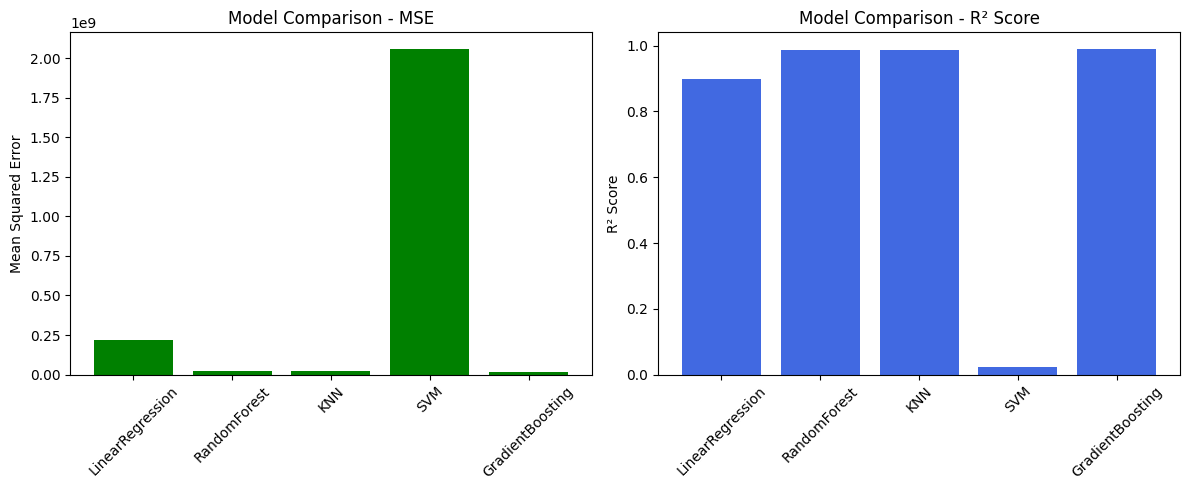

In [21]:
#Creating graphs to compare
# Separate out model names, MSEs, and R² scores
models = list(results.keys())
mse_values = [results[m]['MSE'] for m in models]
r2_values = [results[m]['R2'] for m in models]

plt.figure(figsize=(12, 5))

# MSE Plot
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color='green')
plt.title('Model Comparison - MSE')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# R² Score Plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='royalblue')
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [23]:
!pip install streamlit

In [24]:
#Creating a streamlit web application
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

# Load trained model and preprocessing tools
model = joblib.load("best_model.pkl")
encoders = joblib.load("encoders.pkl")  # Dictionary of LabelEncoders
scaler = joblib.load("GradientBoosting_scaler.pkl")

# Define expected columns
categorical_cols = ["Gender", "Department", "Job_Title", "Education_Level", "Location"]
numeric_cols = ["Age", "Experience_Years"]

# Preprocessing function
def preprocess(input_df):
    input_df = input_df.copy()

    # Encode categorical columns
    for col in categorical_cols:
        if col in encoders:
            encoder = encoders[col]
            try:
                input_df[col] = encoder.transform(input_df[col])
            except ValueError as e:
                raise ValueError(f"Unknown category in column '{col}': {e}")
        else:
            raise ValueError(f"No encoder found for column: {col}")

    # Scale the full input
    final_input = scaler.transform(input_df)

    return final_input

# Streamlit UI
st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")
st.title("💼 Salary Prediction App")
st.subheader("Enter employee details to predict salary")

# Input form
with st.form("input_form"):
    Age = st.slider("Age", 18, 65, 30)
    Gender = st.radio("Gender", ["Male", "Female"])
    Department = st.selectbox("Department", ["Engineering", "Sales", "HR", "Finance", "Product", "Marketing"])
    Job_Title = st.selectbox("Job Title", ["Manager", "Analyst", "Executive", "Engineer", "Intern"])
    Experience_Years = st.slider("Years of Experience", 0, 37, 5)
    Education_Level = st.selectbox("Education Level", ["Bachelor", "Master", "PhD"])
    Location = st.selectbox("Location", ["New York", "San Francisco", "Austin", "Seattle", "Chicago"])

    submitted = st.form_submit_button("Predict Salary")

# Prediction logic
if submitted:
    # Construct input dataframe
    input_data = pd.DataFrame({
        "Age": [Age],
        "Gender": [Gender],
        "Department": [Department],
        "Job_Title": [Job_Title],
        "Experience_Years": [Experience_Years],
        "Education_Level": [Education_Level],
        "Location": [Location]
    })
    st.write("Entered Data:")
    st.write(input_data)
    try:
        processed_input = preprocess(input_data)
        predicted_salary = model.predict(processed_input)
        st.success(f"💰 Predicted Salary: ${predicted_salary[0]:,.2f}")
    except Exception as e:
        st.error(f"⚠️ Error during prediction: {e}")


Writing app.py


In [25]:
!curl https://api.ipify.org


34.145.200.77

In [26]:
!npm install -g localtunnel
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋
added 22 packages in 6s
⠋
⠋3 packages are looking for funding
⠋  run `npm fund` for details
⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙

⠹⠸⠼⠴⠦⠧⠇⠏⠋
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.200.77:8501

your url is: https://ripe-poems-bow.loca.lt
  Stopping...
^C
